In [1]:
import os
from tqdm.notebook import tqdm as tqdm
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
from IPython.display import Image as im
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from scipy.ndimage.filters import gaussian_filter
import random, string
%matplotlib inline

C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel


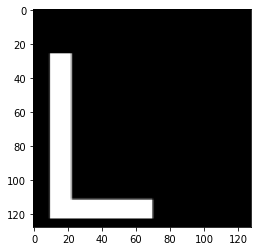

000001_L
C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\DiffusionModelImages\000001_L.jpg


In [2]:
i=1
# Initialization by defining constants
height = 128
width = 128
textFill=255
fontsize = 135  # starting font size # font size doesn't matter

textVertical = 0
textHorizontal = 0

decayConstant=50
decayTime=0.01


namePrefix='{:06}'.format(i)
imageType='.jpg'
folderName='DiffusionModelImages'
cwd = os.getcwd()
print(cwd)
saveDirectory=cwd+"\\"+folderName+'\\'

# Creating an empty image
randomImage = np.zeros((height,width),dtype=np.uint8)
randomImage=Image.fromarray(randomImage)
draw = ImageDraw.Draw(randomImage)

# Choosing an ascii uppercase letter
textInImage = random.choice(string.ascii_uppercase)

font = ImageFont.truetype("arial.ttf", fontsize)
draw.text((textHorizontal, textVertical), textInImage, font=font, fill=(textFill)) # put the text on the image
plt.imshow(randomImage,cmap='gray')
plt.show()

imageName=namePrefix+'_'+textInImage
print(imageName)
imageNameRaw=saveDirectory+imageName+imageType
print(imageNameRaw)
randomImage.save(imageNameRaw)

randomImage=np.asarray(randomImage)
#randomImage=(np.exp(-decayConstant*decayTime)*randomImage).reshape(height,width)
randomImage=Image.fromarray(randomImage)
#plt.imshow(randomImage,cmap='gray')
#plt.show()


randomImageAsArray = np.asarray(randomImage)
randomGenerator = np.random.default_rng(seed=42)


randomImageAsArrayCopy=np.copy(randomImageAsArray)


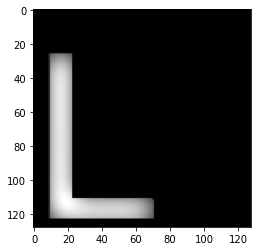

179
C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\DiffusionModelImages\000001_L_Texture.jpg


In [3]:
# Deifning the text texture
letterMask=randomImageAsArray>=50
noiseAsArray_ = randomGenerator.random((randomImage.size[1],randomImage.size[0]))*255
noiseMask = noiseAsArray_ <= 0.50
randomImageAsArrayCopy[noiseMask]=noiseAsArray_[noiseMask]
randomImageAsArrayCopy = np.asarray(gaussian_filter(randomImageAsArrayCopy, sigma=7))
randomImageAsArray[letterMask]=randomImageAsArrayCopy[letterMask]

plt.imshow(randomImageAsArray,cmap='gray')
plt.show()
print(np.max(randomImageAsArray))
imageNameTexture=saveDirectory+imageName+'_Texture'+imageType
print(imageNameTexture)

randomImageTexture=Image.fromarray(randomImageAsArray)
randomImageTexture.save(imageNameTexture)

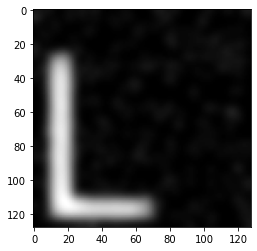

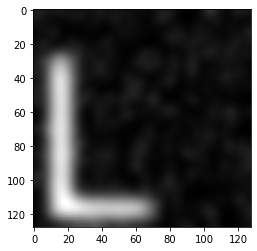

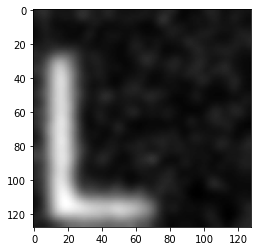

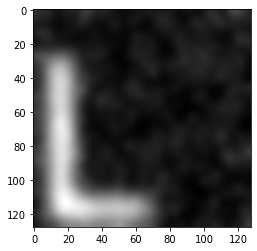

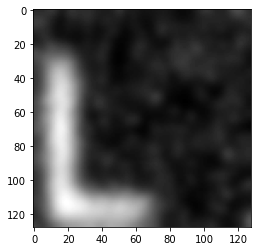

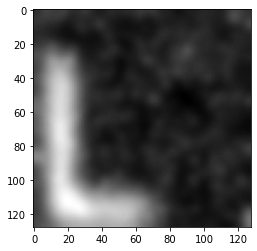

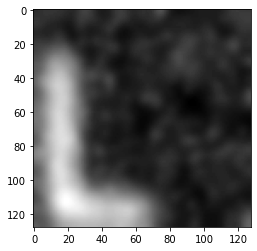

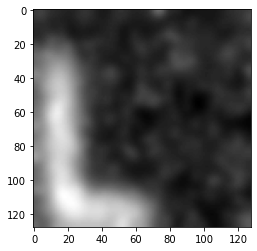

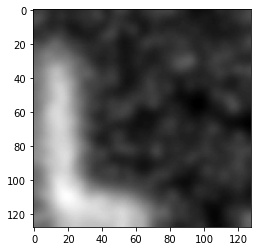

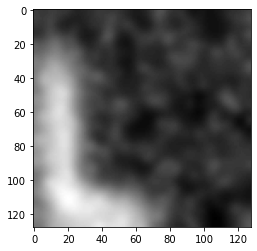

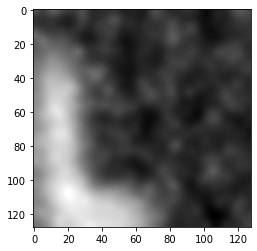

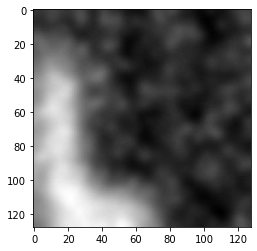

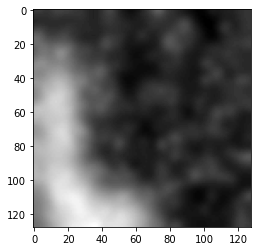

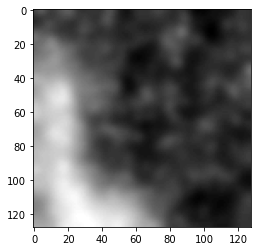

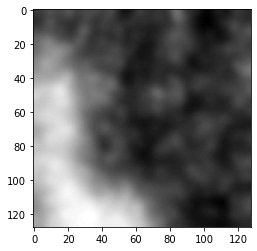

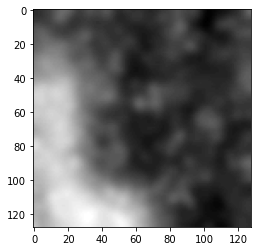

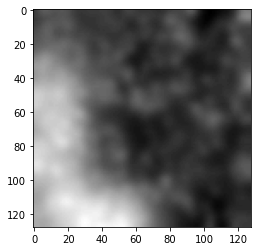

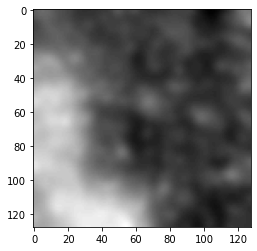

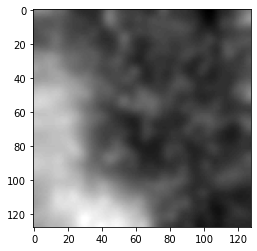

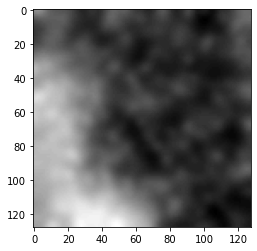

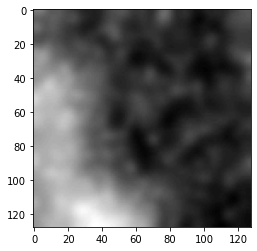

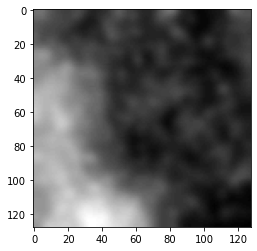

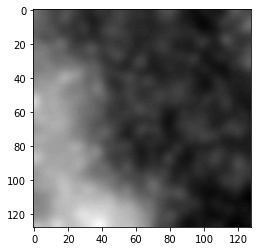

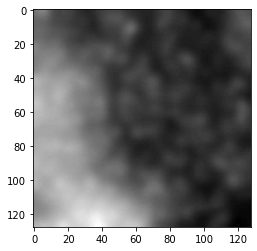

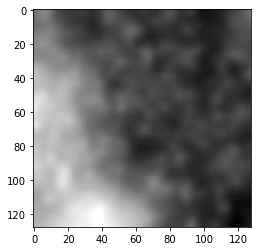

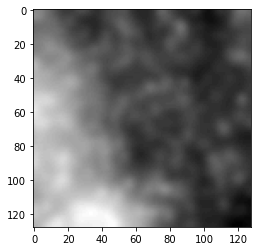

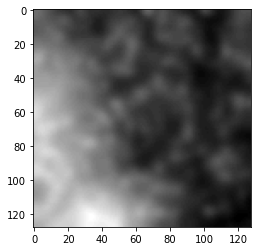

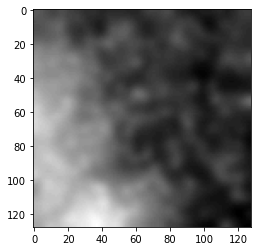

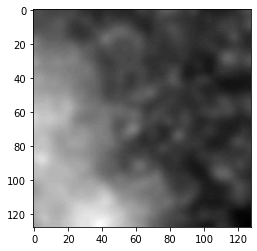

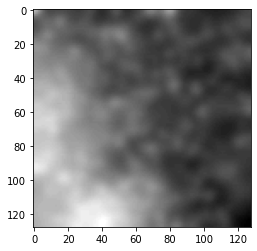

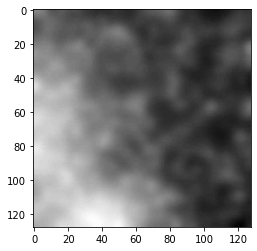

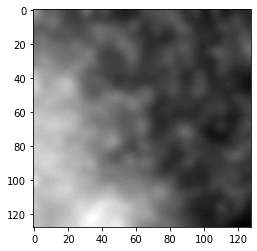

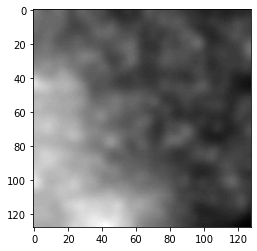

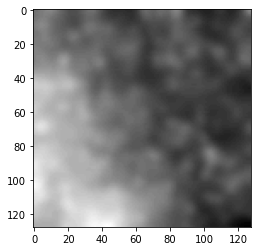

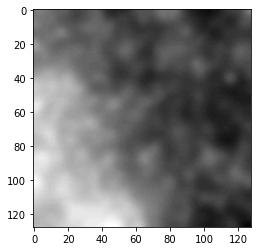

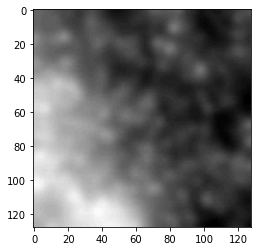

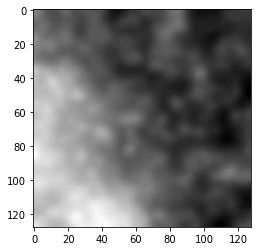

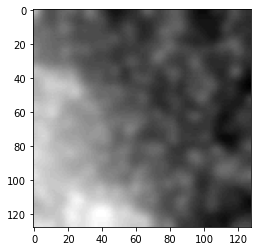

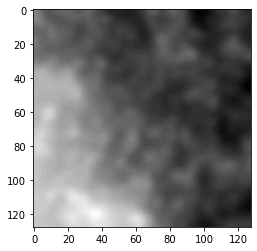

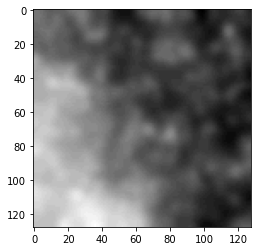

In [4]:
for i in range(40):

    noiseAsArray = randomGenerator.random((randomImage.size[1],randomImage.size[0]))
    mask = noiseAsArray >= 0.98
    noiseAsArray *= 255
    randomImageAsArray[mask]=noiseAsArray[mask]
    #plt.imshow(randomImageAsArray,cmap='gray')
    #plt.show()


    randomImageAsArray = gaussian_filter(randomImageAsArray, sigma=3)
    plt.imshow(randomImageAsArray,cmap='gray')
    plt.show()

In [5]:
imageNameNoisy=saveDirectory+imageName+'_Noisy'+imageType
print(imageNameNoisy)
randomImageNoisy=Image.fromarray(randomImageAsArray)
randomImageNoisy.save(imageNameNoisy)

C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\DiffusionModelImages\000001_L_Noisy.jpg
